In [ ]:
# # Here is the codes to download data from Kaggle
# ! pip install kaggle

# ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle/

# ! chmod 600 ~/.kaggle/kaggle.json # Get your kaggle.json from Kaggle website in advance

# # Import a toy kaggle dataset to try the model interaction
# !pip install opendatasets
# import opendatasets as od
# kagglepath = 'https://www.kaggle.com/competitions/mlns-2023/data' # The link of the target file page
# od.download(kagglepath)

In [1]:
# ! pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.9 MB/s eta 0:00:0000:0100:01


In [97]:
import random
import pandas as pd
import numpy as np
import igraph
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn import preprocessing
import nltk
import csv
# import lightgbm as lgb
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [166]:
# Baseline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import networkx as nx
from sklearn.decomposition import PCA
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

# Load the data
train_data = pd.read_csv('./mlns-2023/train.txt', names=['source', 'target', 'label'], delimiter=' ', header=None)
test_data = pd.read_csv('./mlns-2023/test.txt', names=['source', 'target'], delimiter=' ', header=None)
node_data = pd.read_csv('./mlns-2023/node_information.csv', header=None)


In [167]:
print(train_data.shape)
print(node_data.shape)

(10496, 3)
(3597, 933)


In [ ]:
# np.array(train_data)

In [168]:
test_data.head()

,source,target
0,3425,4524
1,1620,2617
2,4832,6317
3,4984,7298
4,385,5481


# Graph features

In [169]:
# Read the nodes from node information table
ID = node_data.loc[:,0]
## Creates the oriented graph
diG=nx.DiGraph()
#adds the list of papers' IDs
diG.add_nodes_from(ID)

#adds the corresponding links between the actors (training set), links when link_train==1
for ID_from_train,ID_to_train,link_train in np.array(train_data):
    if link_train==1:
        diG.add_edge(ID_from_train,ID_to_train)

  ## Checks the number of edges and creates the non-oriented graph G
G = nx.Graph(diG)

In [70]:
#sort degree centrality 
sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)

[(3809, 0.10038932146829811),
 (6416, 0.013348164627363737),
 (7082, 0.010289210233592881),
 (7272, 0.010289210233592881),
 (7571, 0.010011123470522803),
 (7426, 0.009733036707452725),
 (7283, 0.00917686318131257),
 (361, 0.008898776418242492),
 (7174, 0.008898776418242492),
 (2187, 0.008620689655172414),
 (6551, 0.008620689655172414),
 (887, 0.00778642936596218),
 (6386, 0.007508342602892102),
 (2970, 0.007230255839822024),
 (5560, 0.007230255839822024),
 (6812, 0.006674082313681868),
 (7223, 0.006674082313681868),
 (3314, 0.006395995550611791),
 (4859, 0.006395995550611791),
 (7190, 0.006395995550611791),
 (3087, 0.006117908787541713),
 (5651, 0.006117908787541713),
 (7207, 0.006117908787541713),
 (2330, 0.005839822024471635),
 (3543, 0.005839822024471635),
 (3976, 0.0055617352614015575),
 (5712, 0.0055617352614015575),
 (6961, 0.0055617352614015575),
 (836, 0.0052836484983314795),
 (6868, 0.0052836484983314795),
 (5132, 0.005005561735261402),
 (5882, 0.005005561735261402),
 (7124, 0

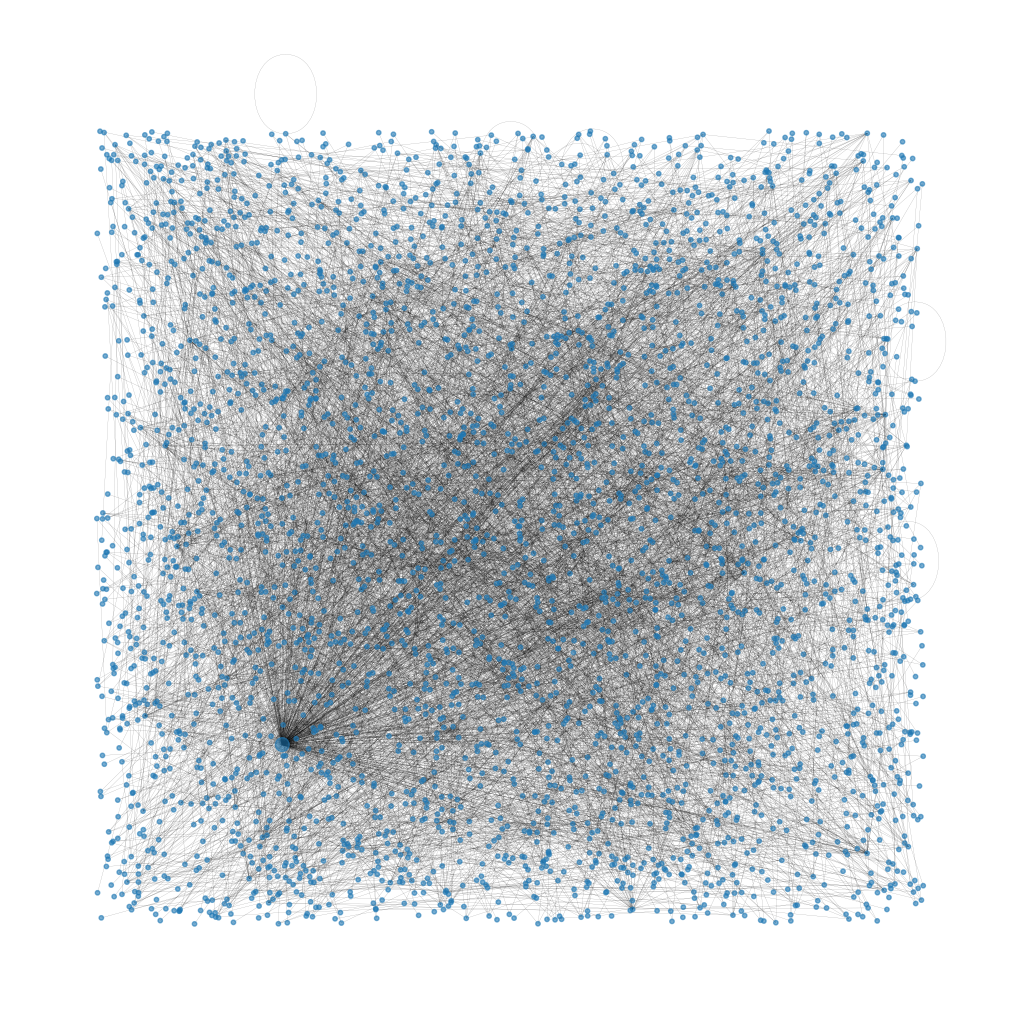

In [51]:
# Plot graph
plt.figure(figsize=(10,10))
pos = nx.random_layout(G, seed=42)
arr = np.full(len(ID), 10, dtype=int)
n = list(ID).index(3809)
arr[n] = 100
nx.draw(G, with_labels=False, pos = pos, node_size = arr, alpha = 0.6, width = 0.1) #showing node '3809' has the highest degree centrality
plt.show()

In [170]:
node_data.columns = ['node'] + ['feature_' + str(i) for i in range(932)]

In [171]:
node_data.head()

,node,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_922,feature_923,feature_924,feature_925,feature_926,feature_927,feature_928,feature_929,feature_930,feature_931
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
source_info = node_data.rename(columns={'node': 'source'}).copy()
target_info = node_data.rename(columns={'node': 'target'}).copy()

# Merge the source node information with the train data
train_data = pd.merge(train_data, source_info, on='source')
train_data = pd.merge(train_data, target_info, on='target')
test_data = pd.merge(test_data, source_info, on='source')
test_data = pd.merge(test_data, target_info, on='target')

In [173]:
train_data.head()

,source,target,label,feature_0_x,feature_1_x,feature_2_x,feature_3_x,feature_4_x,feature_5_x,feature_6_x,...,feature_922_y,feature_923_y,feature_924_y,feature_925_y,feature_926_y,feature_927_y,feature_928_y,feature_929_y,feature_930_y,feature_931_y
0,939,3809,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,179,3809,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,857,3809,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1695,3809,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,520,3809,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [217]:
from tqdm import tqdm
def feature_extractor(graph, samples):
    """
    Creates a feature vector for each edge of the graph contained in samples 
    """
    feature_vector = [] 

    # --- Extract manually diverse features relative to each edge contained in samples --- 

    # Degree Centrality measure
    deg_centrality = nx.degree_centrality(graph)

    # Betweeness centrality measure
    betweeness_centrality = nx.betweenness_centrality(graph)

    n = 0
    # iterate over the rows of the DataFrame
    for i, row in tqdm(samples.iterrows()):
        # edge = (row[0], row[1]) if row[0] == 500 else (row[1], row[0])  # check if 3976 is the source or destination vertex
        edge = (row[0], row[1])
        source_node, target_node = edge[0], edge[1]
        # Centrality
        # Degree Centrality
        source_degree_centrality = deg_centrality[source_node]
        target_degree_centrality = deg_centrality[target_node]
        
        # Betweeness centrality  
        diff_bt = betweeness_centrality[source_node] - betweeness_centrality[target_node]

        # Similarity
        # Preferential Attachement 
        pref_attach = list(nx.preferential_attachment(graph, [(source_node, target_node)]))[0][2]

        # AdamicAdar
        if source_node == target_node:
            aai = 0
        else: 
            aai = list(nx.adamic_adar_index(graph, [(source_node, target_node)]))[0][2]

        # Jaccard
        jacard_coeff = list(nx.jaccard_coefficient(graph, [(source_node, target_node)]))[0][2]
        
        # Create edge feature vector with all metric computed above
        feature_vector.append(np.array([source_degree_centrality, target_degree_centrality, 
                                        diff_bt, pref_attach, aai, jacard_coeff]))
        feature_vector[n] = np.concatenate((feature_vector[n],list(row[2:])))
        n = n+1
            
    return feature_vector

# Other features

In [ ]:
# Total number of common features(from the 933 ones)

# Model training

In [175]:
# --- Create feature vector for all edges in training set and test set ---

# Split the labeled training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:,train_data.columns!='label'], train_data.iloc[:, 2], test_size=0.2, random_state=42)

In [219]:
train_features = feature_extractor(G, X_train)
val_features = feature_extractor(G, X_val)
test_features = feature_extractor(G, test_data)

8396it [00:05, 1502.83it/s]
2100it [00:01, 1457.84it/s]
3498it [00:02, 1493.97it/s]


In [ ]:
train_features

In [ ]:
# for i, row in X_train[:10].iterrows(): 
#     print ('this is i: ',i, 'this is row0: ', row[0], 'this is row1: ', row[1], 'this is row2: ', row[2])
#     print('the rest: ', list(row[2:]))
#     print('yes') if row[0] == 500 else print('no')
#     k = list(row[2:])
#     print(type(k))
#     print(k)

In [ ]:
# feature_extractor(G, X_train[:5])

In [221]:
# Train logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(train_features, y_train)

# Predict labels for validation set and evaluate performance
y_val_pred = model.predict(val_features)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {accuracy}")

Validation accuracy: 0.7076190476190476


In [222]:
# Predict labels for test set and generate submission file
y_test_pred = model.predict(test_features)
submission = pd.DataFrame({"ID": range(test_data.shape[0]), "Predicted": y_test_pred})
submission.to_csv("submission_1_josh.csv", index=False)